In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the dataset # Replace with your file path
file_path = '/Users/user/Documents/Codes/Vinit/YouTube-Analysis-DataScience/dataset/INvideos.csv'
videos_df = pd.read_csv(file_path)

# Convert 'trending_date' and 'publish_time' to datetime
videos_df['trending_date'] = pd.to_datetime(videos_df['trending_date'], format='%y.%d.%m')
videos_df['publish_time'] = pd.to_datetime(videos_df['publish_time'])

# Check for missing values
print("Missing values in each column:\n", videos_df.isnull().sum())

# Remove duplicate entries, keep the first occurrence
videos_df = videos_df.drop_duplicates(subset='video_id', keep='first')

# Check the shape of the dataframe after cleaning
print("Shape of dataframe after cleaning:", videos_df.shape)

# Display the first few rows of the cleaned dataframe
print(videos_df.head())


Missing values in each column:
 video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               561
dtype: int64
Shape of dataframe after cleaning: (16307, 16)
      video_id trending_date  \
0  kzwfHumJyYc    2017-11-14   
1  zUZ1z7FwLc8    2017-11-14   
2  10L1hZ9qa58    2017-11-14   
3  N1vE8iiEg64    2017-11-14   
4  kJzGH0PVQHQ    2017-11-14   

                                               title    channel_title  \
0  Sharry Mann: Cute Munda ( Song Teaser) | Parmi...  Lokdhun Punjabi   
1  पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...          HJ NEWS   
2  Stylish Star 

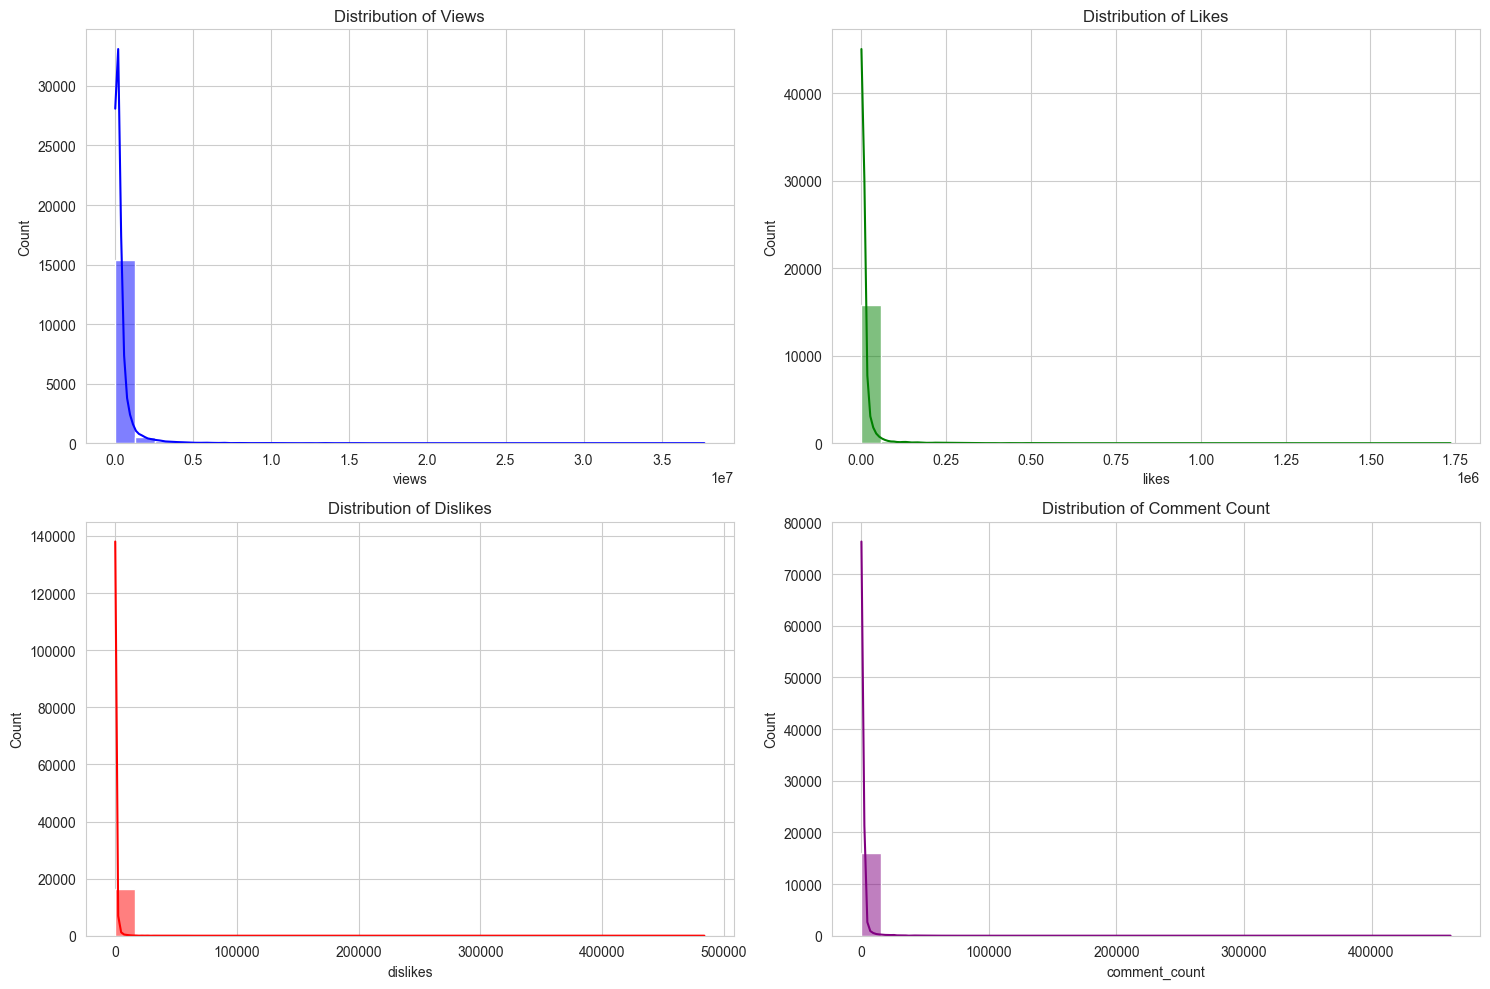

In [3]:

# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Distribution of views, likes, dislikes, and comment count
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.histplot(videos_df['views'], bins=30, ax=axes[0, 0], kde=True, color='blue')
axes[0, 0].set_title('Distribution of Views')

sns.histplot(videos_df['likes'], bins=30, ax=axes[0, 1], kde=True, color='green')
axes[0, 1].set_title('Distribution of Likes')

sns.histplot(videos_df['dislikes'], bins=30, ax=axes[1, 0], kde=True, color='red')
axes[1, 0].set_title('Distribution of Dislikes')

sns.histplot(videos_df['comment_count'], bins=30, ax=axes[1, 1], kde=True, color='purple')
axes[1, 1].set_title('Distribution of Comment Count')

plt.tight_layout()
plt.show()


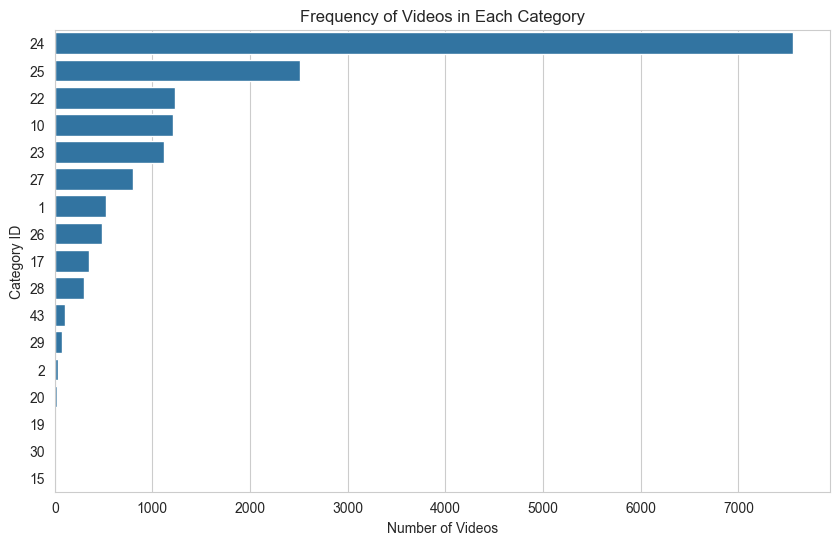

In [4]:
# Frequency of videos in each category
plt.figure(figsize=(10, 6))
sns.countplot(y='category_id', data=videos_df, order = videos_df['category_id'].value_counts().index)
plt.title('Frequency of Videos in Each Category')
plt.xlabel('Number of Videos')
plt.ylabel('Category ID')
plt.show()


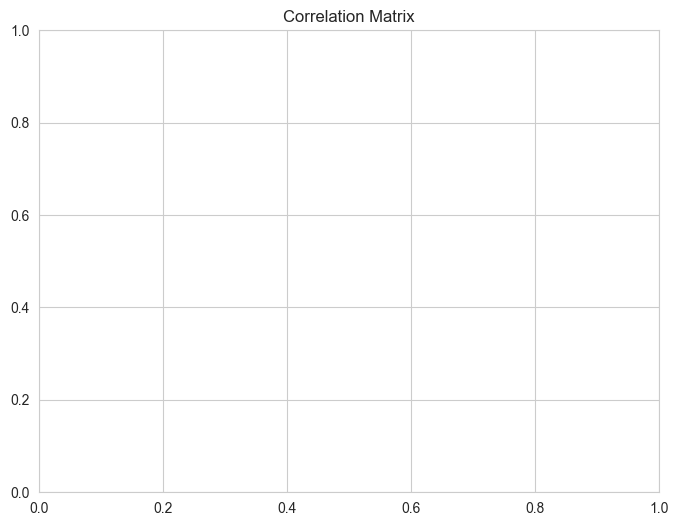

In [5]:
# Correlation matrix of numerical variables
# corr_matrix = videos_df['views'].corr()
plt.figure(figsize=(8, 6))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


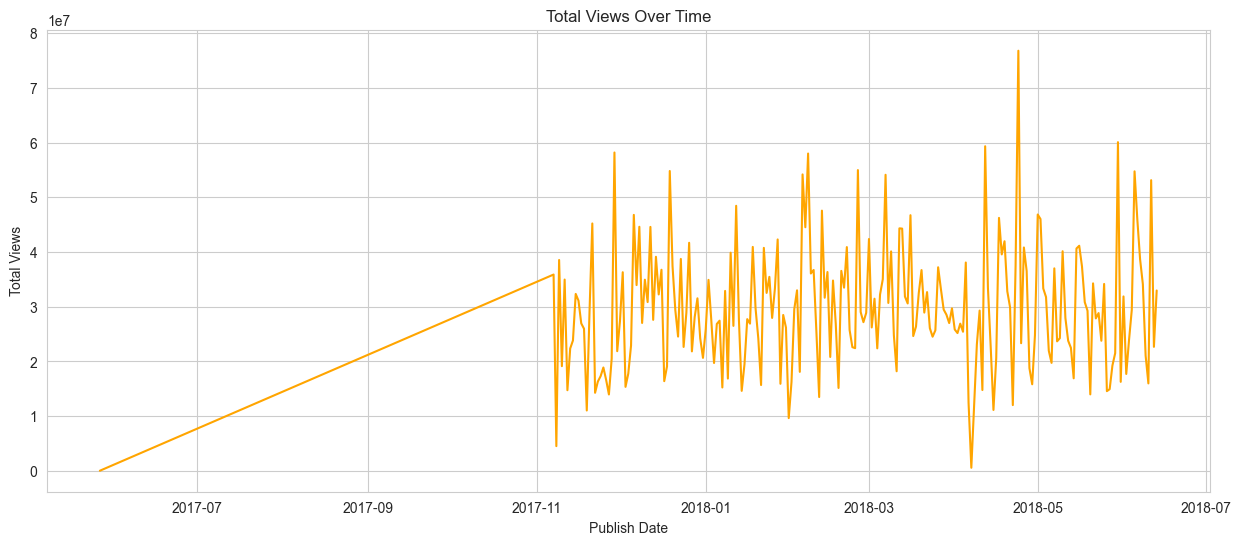

In [6]:
# Trends over time (e.g., views over time)
videos_df['publish_date'] = videos_df['publish_time'].dt.date
plt.figure(figsize=(15, 6))
videos_df.groupby('publish_date')['views'].sum().plot(kind='line', color='orange')
plt.title('Total Views Over Time')
plt.xlabel('Publish Date')
plt.ylabel('Total Views')
plt.show()


In [7]:
#Data Overview
# Number of unique videos and channels
unique_videos = videos_df['video_id'].nunique()
unique_channels = videos_df['channel_title'].nunique()

# Basic statistics for views, likes, dislikes, and comments
basic_stats = videos_df[['views', 'likes', 'dislikes', 'comment_count']].describe()

print("Number of unique videos:", unique_videos)
print("Number of unique channels:", unique_channels)
print("\nBasic statistics for key metrics:")
print(basic_stats)


Number of unique videos: 16307
Number of unique channels: 1422

Basic statistics for key metrics:
              views         likes       dislikes  comment_count
count  1.630700e+04  1.630700e+04   16307.000000   16307.000000
mean   3.977749e+05  1.048038e+04     575.222665    1168.575826
std    1.094019e+06  4.544844e+04    4310.856031    7669.229132
min    4.024000e+03  0.000000e+00       0.000000       0.000000
25%    7.046850e+04  4.880000e+02      58.000000      41.000000
50%    1.514710e+05  1.491000e+03     152.000000     164.000000
75%    3.443605e+05  4.922500e+03     414.000000     578.000000
max    3.773628e+07  1.735914e+06  483933.000000  461956.000000


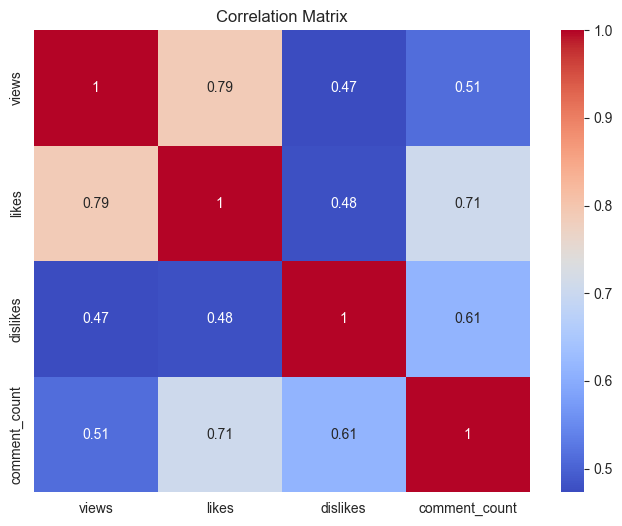

In [8]:
#Correlation between views, likes, dislikes, and comments
# Correlation matrix of numerical variables
corr_matrix = videos_df[['views', 'likes', 'dislikes', 'comment_count']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


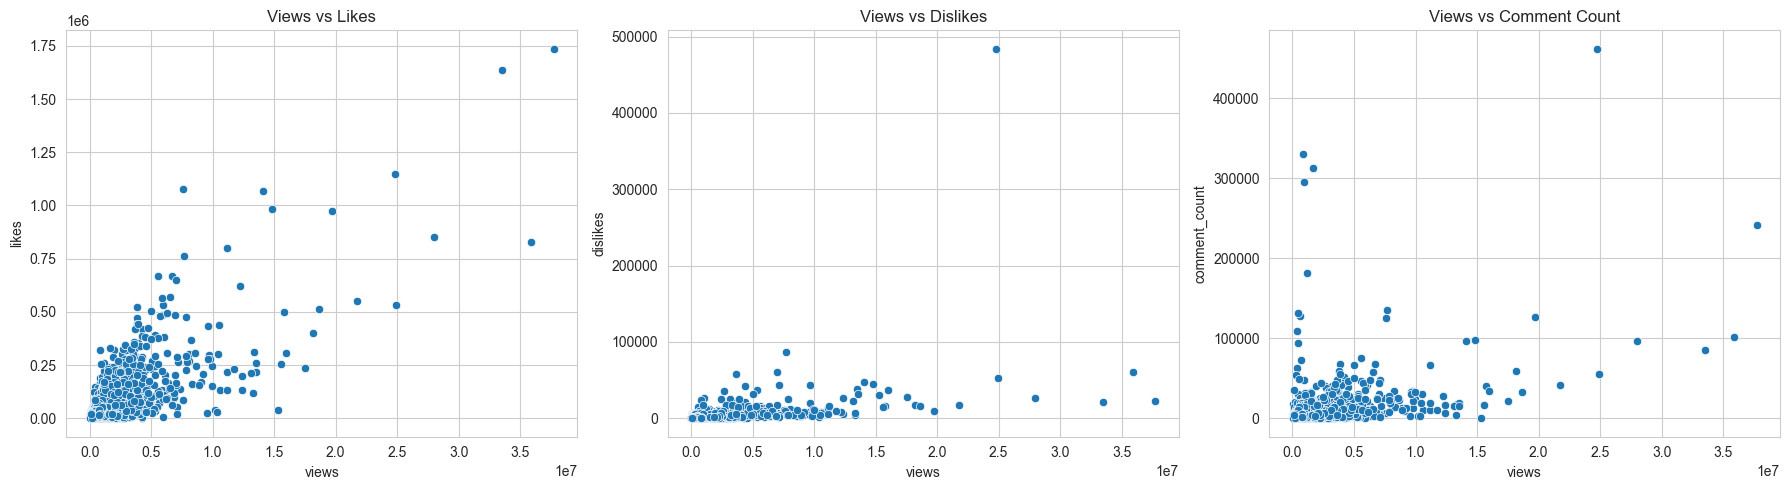

In [9]:
# Plotting scatter plots for views vs likes, views vs dislikes, and views vs comments
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(data=videos_df, x='views', y='likes', ax=axes[0])
axes[0].set_title('Views vs Likes')

sns.scatterplot(data=videos_df, x='views', y='dislikes', ax=axes[1])
axes[1].set_title('Views vs Dislikes')

sns.scatterplot(data=videos_df, x='views', y='comment_count', ax=axes[2])
axes[2].set_title('Views vs Comment Count')

plt.tight_layout()
plt.show()


/var/folders/s8/4zp50x0n7y16nrb1gyrznp6m0000gn/T/ipykernel_13090/2516019231.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='views', y='title', data=top_videos, palette='viridis')


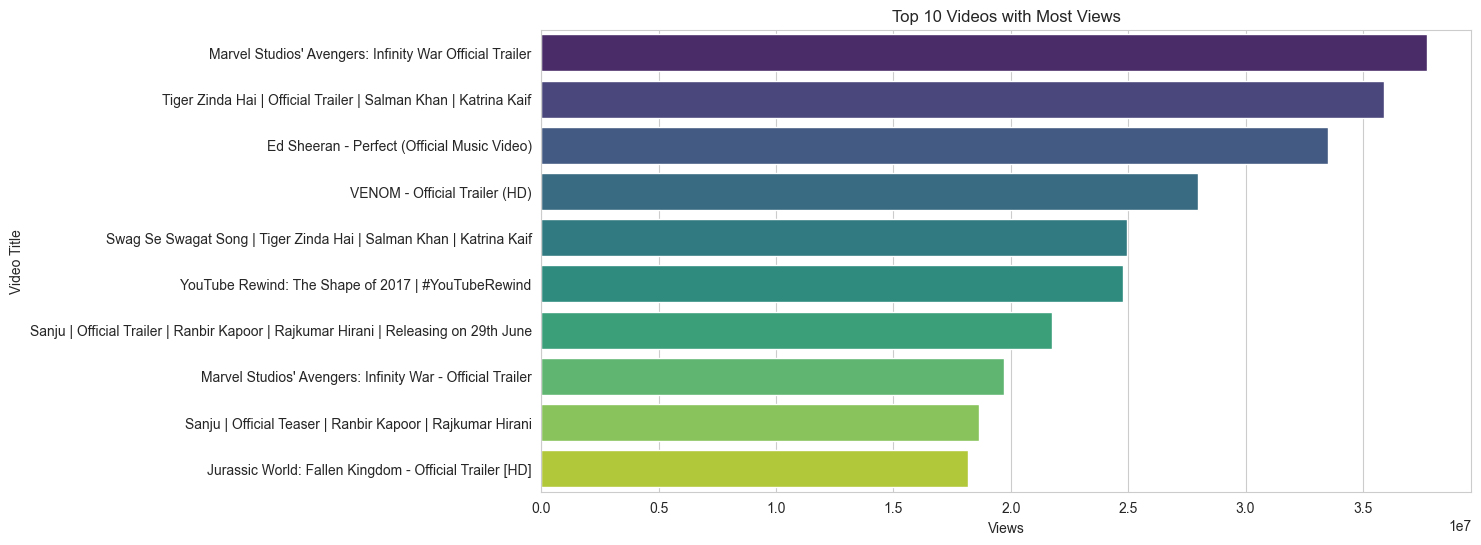

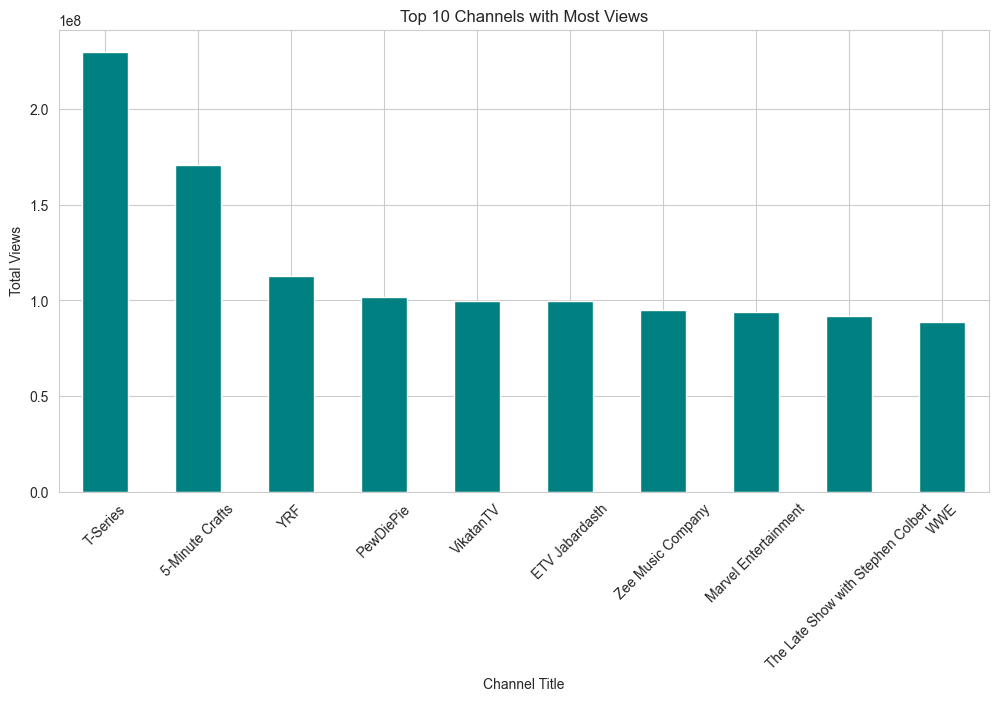

In [10]:
# Top 10 videos with the most views
top_videos = videos_df.sort_values(by='views', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='views', y='title', data=top_videos, palette='viridis')
plt.title('Top 10 Videos with Most Views')
plt.xlabel('Views')
plt.ylabel('Video Title')
plt.show()

# Top 10 channels with the most views
top_channels = videos_df.groupby('channel_title')['views'].sum().sort_values(ascending=False).head(10)
top_channels.plot(kind='bar', figsize=(12, 6), color='teal')
plt.title('Top 10 Channels with Most Views')
plt.xlabel('Channel Title')
plt.ylabel('Total Views')
plt.xticks(rotation=45)
plt.show()


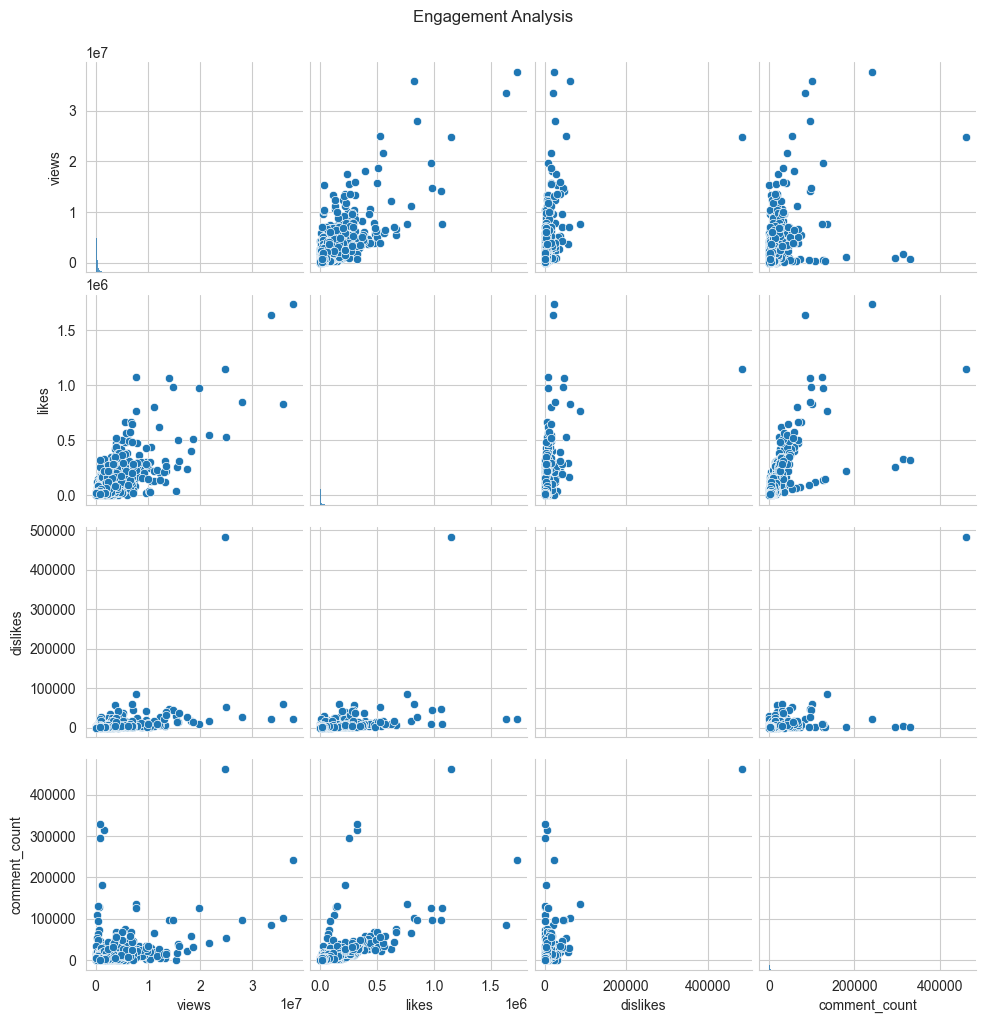

In [11]:
# Engagement Analysis - Relationship between views, likes, dislikes, and comments
# 'views', 'likes', 'dislikes', and 'comment_count' are the key engagement metrics

# Scatter plots to show the relationships
sns.pairplot(videos_df[['views', 'likes', 'dislikes', 'comment_count']])
plt.suptitle('Engagement Analysis', y=1.02)
plt.show()

# Note: Consider applying a log transformation for a more normalized view


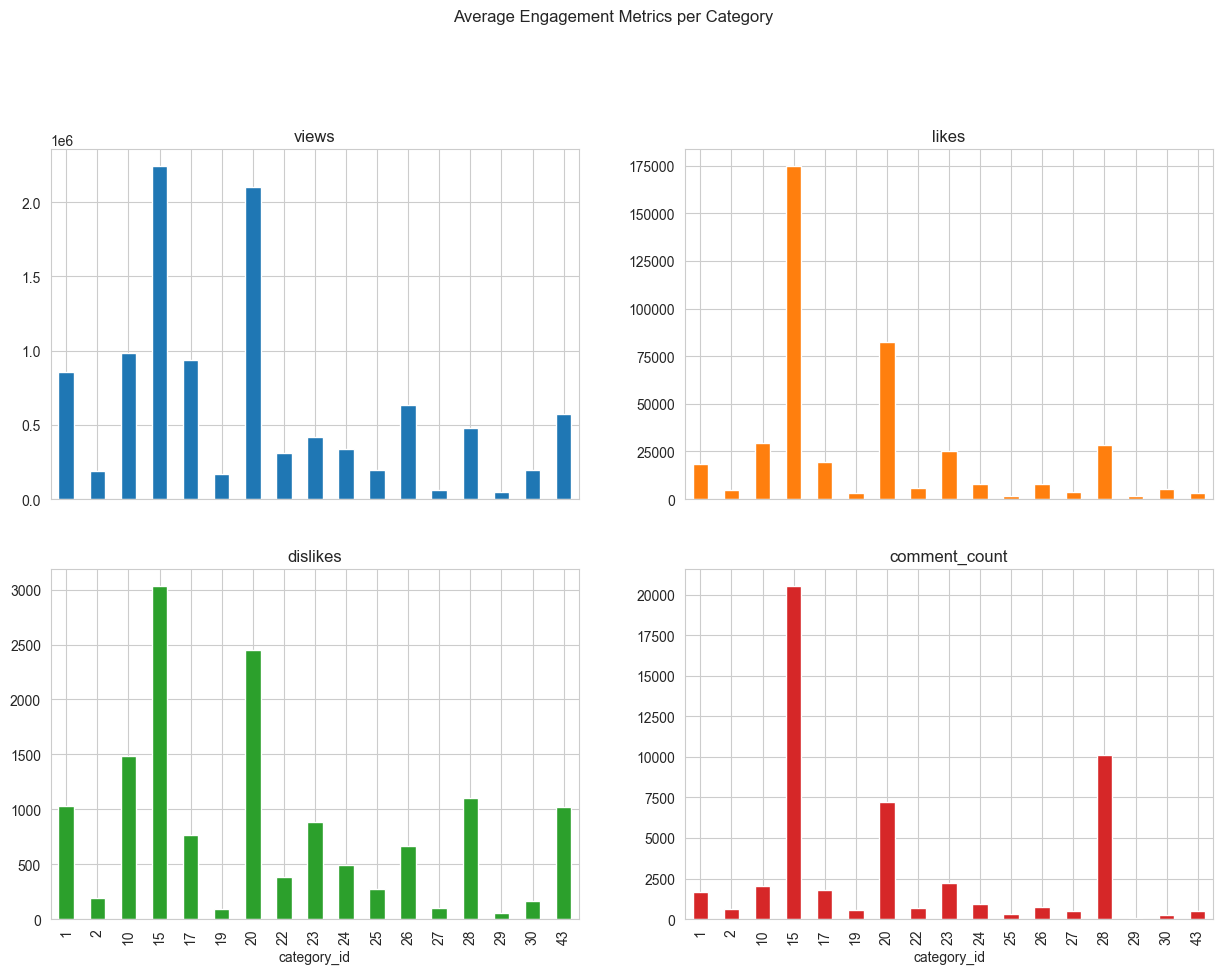

In [12]:
# Category Analysis - Average engagement metrics per category
# 'category_id' is used to group the videos, and we calculate the mean for key metrics

# Grouping by category and calculating mean
category_analysis = videos_df.groupby('category_id')[['views', 'likes', 'dislikes', 'comment_count']].mean()

# Plotting the results
category_analysis.plot(kind='bar', subplots=True, layout=(2, 2), figsize=(15, 10), legend=False)
plt.suptitle('Average Engagement Metrics per Category', y=1.02)
plt.show()

# Note: You might need a mapping for category_id to category names for better interpretation


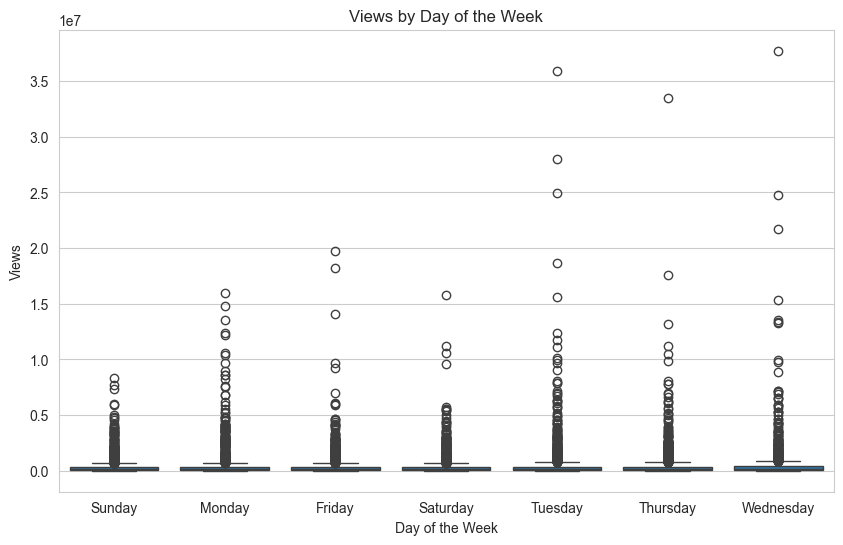

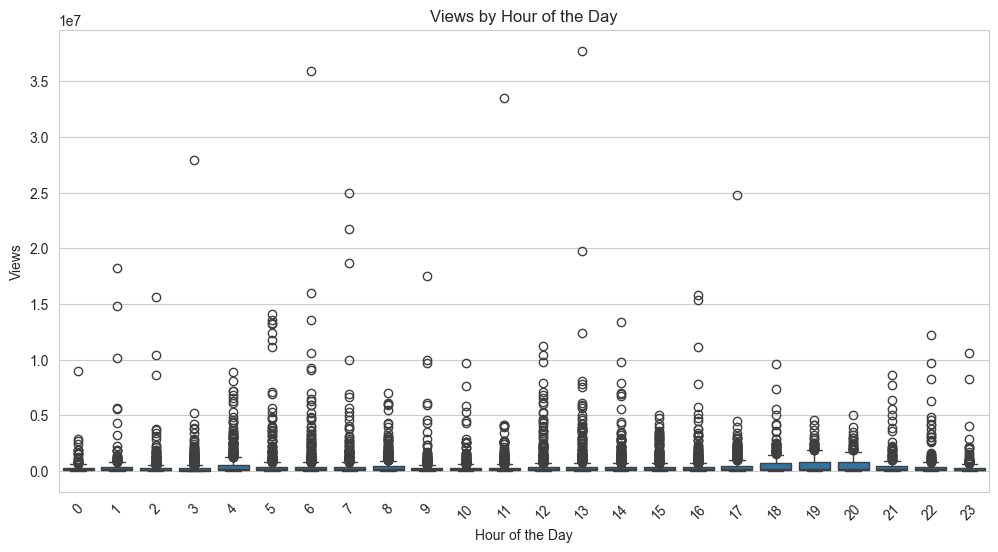

In [13]:
# Temporal Trends - Analyzing how metrics vary by day of the week or hour of the day
# 'publish_time' is used to extract the day and hour

# Extracting day of the week and hour from publish_time
videos_df['publish_day'] = videos_df['publish_time'].dt.day_name()
videos_df['publish_hour'] = videos_df['publish_time'].dt.hour

# Views by day of the week
plt.figure(figsize=(10, 6))
sns.boxplot(x='publish_day', y='views', data=videos_df)
plt.title('Views by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Views')
plt.show()

# Views by hour of the day
plt.figure(figsize=(12, 6))
sns.boxplot(x='publish_hour', y='views', data=videos_df)
plt.title('Views by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Views')
plt.xticks(rotation=45)
plt.show()

# Note: Investigate if certain days or hours are more favorable for publishing


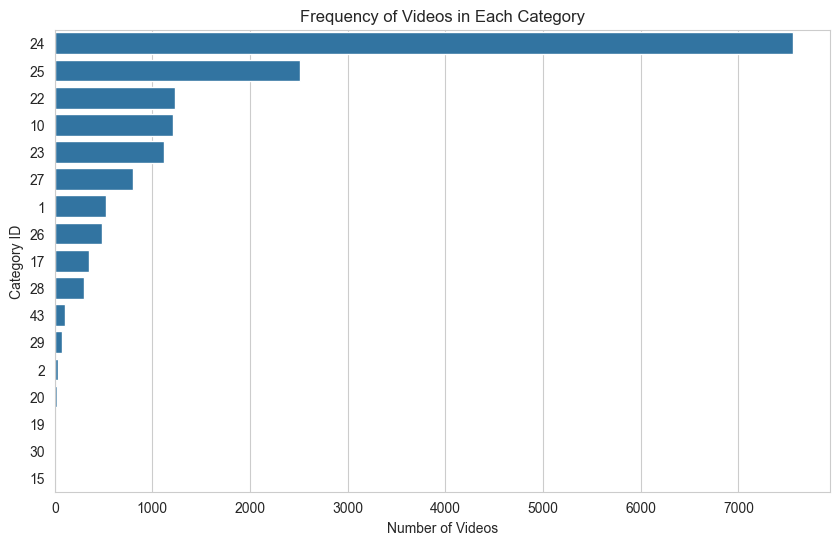

In [14]:
# Frequency of videos in each category
plt.figure(figsize=(10, 6))
sns.countplot(y='category_id', data=videos_df, order = videos_df['category_id'].value_counts().index)
plt.title('Frequency of Videos in Each Category')
plt.xlabel('Number of Videos')
plt.ylabel('Category ID')
plt.show()


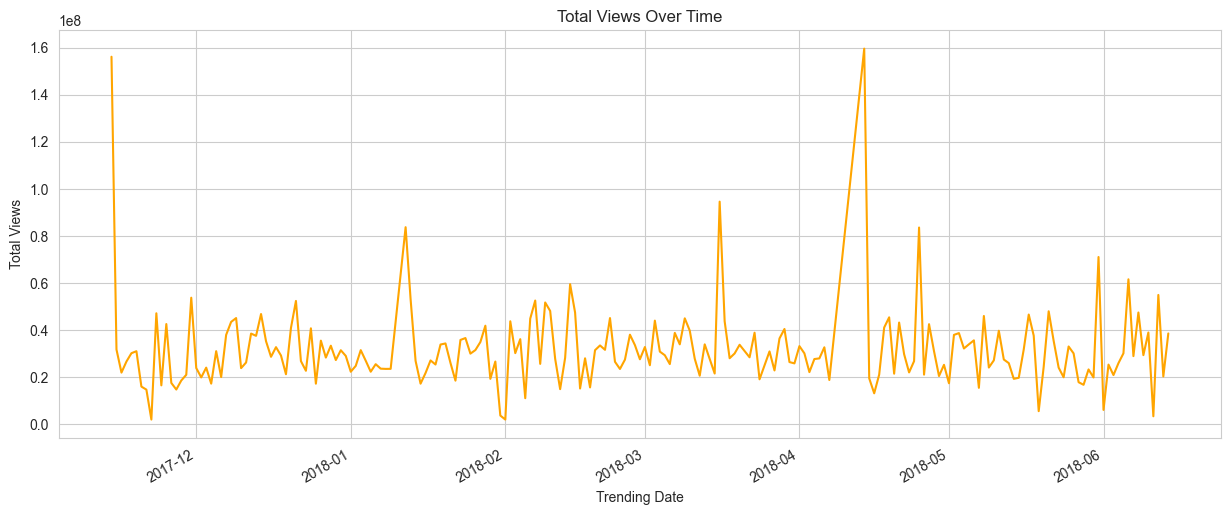

In [15]:
# Trend of views over time
plt.figure(figsize=(15, 6))
videos_df.groupby('trending_date')['views'].sum().plot(kind='line', color='orange')
plt.title('Total Views Over Time')
plt.xlabel('Trending Date')
plt.ylabel('Total Views')
plt.show()


In [16]:
# import nltk
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize
# from wordcloud import WordCloud
# import matplotlib.pyplot as plt

# # Download stopwords from nltk
# nltk.download('punkt')
# nltk.download('stopwords')

# # Text Preprocessing
# # Combine all descriptions into one large text, handling NaN values
# all_descriptions = ' '.join(description for description in videos_df['description'].astype(str) if description)

# # Convert text to lowercase and tokenize (split into words)
# tokens = word_tokenize(all_descriptions.lower())

# # Remove stopwords and non-alphabetic tokens
# english_stopwords = set(stopwords.words('english'))
# words = [word for word in tokens if word.isalpha() and word not in english_stopwords]

# # Word Frequency Analysis
# word_freq = nltk.FreqDist(words)

# # Visualization with a Word Cloud
# wordcloud = WordCloud(width=800, height=400, background_color ='white').generate_from_frequencies(word_freq)

# # Plotting the Word Cloud
# plt.figure(figsize=(10, 5))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.title('Most Common Words in Trending Videos Descriptions')
# plt.show()
